In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import timedelta, datetime
import pandas as pd

In [2]:
interval = '15m'
end = datetime.today() 
start = end - timedelta(days=60-1)
end = end.strftime('%Y-%m-%d')
start = start.strftime('%Y-%m-%d')

In [3]:
ticker = yf.Ticker('BTC-USD')
df_ticker = ticker.history(start=start, end=end, interval=interval)

In [4]:
index_time = pd.date_range(start=start, end=end, tz='UTC', freq=timedelta(minutes=15))

# nearest_timestamps = df_ticker.index.get_indexer(index_time, method='nearest')
# nearest_df = df_ticker.iloc[nearest_timestamps]

In [5]:
fill_df = df_ticker.reindex(index_time).copy()

In [6]:
fill_df.fillna(method='ffill', inplace=True)

In [21]:
A = np.empty((5, 22))

In [56]:
for i, delta_t in enumerate(np.arange(15, 125, 5)):
    for q in range(1, 6):
        index_time = pd.date_range(start=start, end=end, tz='UTC', freq=timedelta(minutes=int(delta_t)))
        fill_df = df_ticker.reindex(index_time).copy()
        fill_df.fillna(method='ffill', inplace=True)
        
        S = np.sum(np.abs(np.log(fill_df['Close']).diff())) ** q
        A[q-1, i] = S

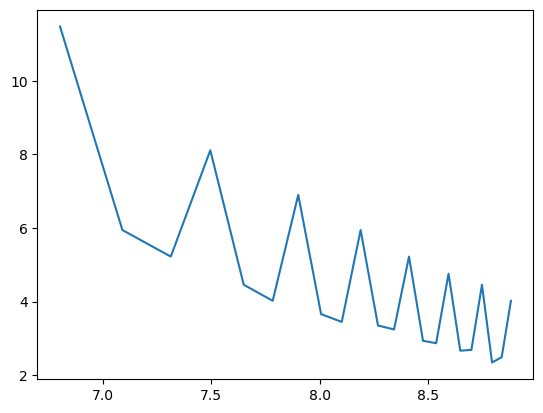

In [58]:
plt.plot(np.log(np.arange(15, 125, 5) * 60), A[0]);

array([6.80239476, 7.09007684, 7.31322039, 7.49554194, 7.64969262,
       7.78322402, 7.90100705, 8.00636757, 8.10167775, 8.18868912,
       8.26873183, 8.3428398 , 8.41183268, 8.4763712 , 8.53699582,
       8.59415423, 8.64822145, 8.69951475, 8.74830491, 8.79482493,
       8.83927669, 8.88183631])